2023 Updates:
1) In your file name, you can now specify cells and subcellular regions if you are analyzing multiple neurons and regions of the same neuron. For instance, on a given slide I will often have AFD:GCaMP and AIY:GCaMP animals, and within AFD I want to analyze both the soma and axon. In ImageJ/Fiji I will generate separate GCaMP/RFP files for each neuron / subcellular compartment. I will name the files via the following syntax:
RepName_CellName_SubcellName_Results.csv
For instance, instead of 
051021_3055_12deghold_Sinusoid_Ramp_Tc25_0min_A_1_Results.csv
I'll have
051021_3055_12deghold_Sinusoid_Ramp_Tc25_0min_A_1_AFD_Results.csv
or
051021_3055_12deghold_Sinusoid_Ramp_Tc25_0min_A_1_AFD_Axon_Results.csv.

Note: the code does not *require* these additions, just allows for them. If you specify that the cell is AFD or AIY, the code will authomatically calculate AIY responses/response rate and AFD onset temperatures.
The subcellular name can be anything.

The way these names are called is when load_GCaMP_RFP_meta_stim is called, cell and subcell are kwargs that can take input names (default is 'None'), below are examples of how this function is called (right) for a given results file name (left):
051021_3055_12deghold_Sinusoid_Ramp_Tc25_0min_A_1_Results.csv    -->    load_GCaMP_RFP_meta_stim(Meta, Stim)
I'll have
051021_3055_12deghold_Sinusoid_Ramp_Tc25_0min_A_1_AFD_Results.csv    -->    load_GCaMP_RFP_meta_stim(Meta, Stim, cell='AFD')
or
051021_3055_12deghold_Sinusoid_Ramp_Tc25_0min_A_1_AFD_Axon_Results.csv    -->    load_GCaMP_RFP_meta_stim(Meta, Stim, cell='AFD', subcell = 'Axon')

2) Heatmaps are now ordered from the replicate with the strongest max delta F/F or R/R signal to the weakest.

3) Heatmaps in the same figure are guaranteed to be on the same scale, ranging from the max across all heatmaps to the min across all heatmaps. If this ever is not appropriate for your data, where imshow is called vmax and vmin can be hardcoded to other numbers rather than the min/max across the dataset.

4) Turned plotting into a function - this will make it more restricted but hopefully more ready to use out of the box.
Options in plotting function are: 
separate_temp: default is False, making True will plot temp stimulus and average delta R/R values on two separate plots
start_ind/stop_ind: can set as an index number, default is min=0/max=length of first condition plotted
colorbar: default is False, true would plot a colorbar next to the heatmaps (good for checking but takes up space and misaligns heatmaps from average plots)
sort: default is True, changing to false will make heatmaps no longer sorted by row max

5) Time is in seconds instead of miliseconds.


Original markdown:
This script assumes you have at least a GCaMP and metadata file in the same folder with the following naming convention:
GCaMP file = 'Replicate_name_Results.csv'
Metadata file = 'Replicate_name_MMStack_Pos0_metadata.txt'

You may also have an RFP results file with the following name:
RFP file = 'Replicate_name_Results_RFP.csv'

For each replicate you must also have a stim file with the auto-generated name of 'Start_time.txt'

For each condition you which to analyze, create a list of corresponding replicate names and stim file names. For example,
see below for the Min0 condition examples:
Min0_meta = ['051021_3055_12deghold_Sinusoid_Ramp_Tc25_0min_A_1', '051121_3055_12deghold_Sinusoid_Ramp_Tc25_0min_A_1']
Min0_stim = ['051021_171757_216', '051121_214436_704']

If these files are in a different directory from the code, specify the directory name like 'input_directory/Replicate_name'
or 'input_directory/stim_name' in each list.

The function 'load_GCaMP_RFP_meta_stim' will load in your data, align it to the temperature stimulus, and calculate the
metrics below. 

The input to load_GCaMP_RFP_meta_stim are 1) the list of replicate names, 2) the list of stimulus names,
3) the cell type (AFD or AIY) as a string (different parameters are calculated for the two cell types), 4) RFP_check = False
must be provided as an input to this function if there is NO corresponding Results_RFP.csv file.

Calling this function for our Min0 example:
Min0 = load_GCaMP_RFP_meta_stim(Min0_meta, Min0_stim, 'AFD')
If there was no RFP file we would specify:
Min0 = load_GCaMP_RFP_meta_stim(Min0_meta, Min0_stim, 'AFD', RFP_check = False)

Each metric is stored as an array (GCaMP, RFP, Scaled, Delta) or a list (Mean, Std_high, Std_low, Mean_Delta,
Std_high_Delta, Std_low_Delta, Time, Temp). Each column in the array/list corresponds to a 1/10th of a second interval from the
temperature stimulus. Each row in the arrays corresponds to an ROI/neuron/row from your initial results file. All of the metrics
are stored in one dictionary with the condition name (e.g. Min0), and the dictionary keys are the metric names. For example,
Min0['GCaMP'] returns the array of GCaMP values where each column is a 1/10th second time point and each row is an ROI/neuron/
row from your initial results file. 

Below are listed all of the metrics calculated for both AFD and AIY
GCaMP: Array of GCaMP values.
RFP: Array of RFP values.
Scaled: For each time point the GCaMP/RFP ratio is calculated, then the ratios for each ROI are min-max scaled on a range from 0
    to 1.
Delta: The GCaMP/RFP ratios for each frame are normalized by subtracting the min ratio from each then dividing by the min ratio.
Mean: The average min-max scaled ratio for each timepoint.
Std_high: One standard deviation above the average min-max scaled ratio for each timepoint.
Std_low: One standard deviation below the average min-max scaled ratio for each timepoint.
Mean_Delta: The average delta F / F ratio for each timepoint.
Std_high_Delta: One standard deviation above the average delta F / F ratio for each timepoint.
Std_low_Delta: One standard deviation below the average delta F / F ratio for each timepoint.
Time: The time passed from the start of the stimulus for each timepoint.
Temp: The temperature at each timepoint.

Below are listed all the metrics calculated for just AFD:
Deriv: Instantaneous derivative of the average min-max scaled ratio for each timepoint (list).
Response_frame: Initial frame (after the start point, default one min) when the AFD deriv crosses the specified threshold. The start point and 
    threshold are specified in the function 'find_AFD_deriv_and_response_thresh' and can be altered.
Response_temp: Temperature experienced at the point of the response_frame.

Below are listed all the metrics calculated for just AIY:
Resp: Array of zeroes, except values set to 1 at the timepoints where the AIY scaled ratio derivatives cross the specified
    threshold (which can be changed in the function 'calc_AIY_responses')
Resp_Rate: The frequency with which each AIY responds per specified time period (which can be changed in the same function,
    default is one minute)
Mean_Resp_Rate: The average resp_rate across all AIYs.

To save any figure generated you can right click and save figure, or utilize plt.savefig()
Matplotlib pyplot is used to plot all figures here, for troubleshooting can google matplotlib functionalities.
The simple command plt.plot(x_values,y_values) will produce a plot, all other lines for each plot are adding features,
improving appearance.

Feel free to each out to me (Jon) with questions!!

'''

In [13]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
sns.set_style("white")
sns.set_style("ticks") 
from scipy.stats import sem
from scipy.stats import tstd
from sklearn.preprocessing import minmax_scale
from matplotlib.pyplot import cm
import subprocess
import json

from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

mpl.rcParams['image.interpolation']='none'

In [15]:
def extract_frameTimes_from_metadata(metadata_filename):
    frameTimes = []
    
    with open(metadata_filename) as f:
        metadata = json.load(f)
    f.close()
    
    if int(metadata['Summary']['MicroManagerVersion'][0]) == 1:
        print('MicroManager v1')
        hour = int(metadata['FrameKey-0-0-0']['Time'][11:13])
        minute = int(metadata['FrameKey-0-0-0']['Time'][14:16])
        second = int(metadata['FrameKey-0-0-0']['Time'][17:19])
        start_time = (hour*60*60*1000)+(minute*60*1000)+(second*1000)-int(metadata['FrameKey-0-0-0']['ElapsedTime-ms'])
    elif int(metadata['Summary']['MicroManagerVersion'][0]) > 1:
        print('MicroManager v2 or greater')
        hour = int(metadata['Summary']['StartTime'][11:13])
        minute = int(metadata['Summary']['StartTime'][14:16])
        second = int(metadata['Summary']['StartTime'][17:19])
        start_time = (hour*60*60*1000)+(minute*60*1000)+(second*1000)+int(metadata['Summary']['StartTime'][20:23])

    for i in range(len(metadata.keys())-1):
        frame_name = "FrameKey-"+str(i)+"-0-0"
        #print(frame_name, start_time + int(metadata[frame_name]['ElapsedTime-ms']))
        frameTimes.append(start_time + int(metadata[frame_name]['ElapsedTime-ms']))
            
    return frameTimes

def extract_temps_times_from_metadata(stim_filename):
    Stim_data = {}
    Stim_data['Temp'] = []
    Stim_data['Time'] = []
    with open(stim_filename, "r") as stim:
        if '/' in stim_filename:
            stim_filename = stim_filename.split('/')[-1]
            
        rep_to_time = stim_filename.split(".txt")[0].split("_")
        hour = int(rep_to_time[1][0]+rep_to_time[1][1])
        minute = int(rep_to_time[1][2]+rep_to_time[1][3])
        #second = int(rep_to_time[1][4]+rep_to_time[1][5])
        #ms = int(rep_to_time[2])
        #starting_time = (hour*60*60*1000)+(minute*60*1000)+(second*1000)+ms
        hour_min = (hour*60*60*1000)+(minute*60*1000)

        elapsed_time_check = 0
        elapsed_min = 0
        for line in stim:
            #print(line
            pieces = line.split("\t")
            if len(pieces) < 2 or len(pieces) > 4:
                continue
            else:
                Stim_data['Temp'].append(float(pieces[0]))

                sec = int(pieces[3].split(".")[0])
                ms = int(pieces[3].split(".")[1])
                elapsed_time = (elapsed_min*60*1000)+(sec*1000)+ms
                
                if (hour_min+elapsed_time) >= 86400000:
                    midnight_crossing = hour_min+elapsed_time
                    elapsed_time = midnight_crossing - 86400000
                    elapsed_time_check = -1
                    hour_min = 0
                    elapsed_min = 0

                if elapsed_time > elapsed_time_check:
                    Stim_data['Time'].append(hour_min+elapsed_time)
                    elapsed_time_check = elapsed_time
                elif elapsed_time <= elapsed_time_check:
                    elapsed_min += 1
                    elapsed_time = (elapsed_min*60*1000)+(sec*1000)+ms
                    Stim_data['Time'].append(hour_min+elapsed_time)
                    elapsed_time_check = elapsed_time
                else:
                    print('issue, something wrong')
    stim.close()
    return Stim_data

def align_Ca_to_stim(GCaMP_array, RFP_array, frameTimes, Stim):
    Stim_aligned_data = {}
    Stim_aligned_data['GCaMP'] = np.zeros((len(GCaMP_array),len(Stim['Time'])))
    Stim_aligned_data['RFP'] = np.zeros((len(RFP_array),len(Stim['Time'])))
    Stim_aligned_data['Time'] = []
    Stim_aligned_data['Temp'] = Stim['Temp']
    check = 1
    midnight_checker = 0
    for i in range(len(Stim['Time'])):
        if Stim['Time'][i-1] > 86340000 and Stim['Time'][i] < 60000 and midnight_checker == 0:
            Stim_aligned_data['Time'].append(Stim['Time'][i]+(86400000-Stim['Time'][0]))
            midnight_checker = 1
        elif midnight_checker == 1: 
            Stim_aligned_data['Time'].append(Stim['Time'][i]+(86400000-Stim['Time'][0]))
        else:
            Stim_aligned_data['Time'].append(Stim['Time'][i]-Stim['Time'][0])
        if Stim['Time'][i] > max(frameTimes):
            for j in range(len(GCaMP_array)):
                Stim_aligned_data['GCaMP'][j,i] = GCaMP_array[j,(len(GCaMP_array[j,:])-1)]
                Stim_aligned_data['RFP'][j,i] = RFP_array[j,(len(RFP_array[j,:])-1)]
            print('missed end')
        elif Stim['Time'][i] < min(frameTimes):
            for j in range(len(GCaMP_array)):
                Stim_aligned_data['GCaMP'][j,i] = GCaMP_array[j,0]
                Stim_aligned_data['RFP'][j,i] = RFP_array[j,0]
            print('missed start')
        else:
            for j in range(check, len(frameTimes)):
                if frameTimes[j-1] < Stim['Time'][i] <= frameTimes[j]:
                    for k in range(len(GCaMP_array)):
                        Stim_aligned_data['GCaMP'][k,i] = GCaMP_array[k,j]
                        Stim_aligned_data['RFP'][k,i] = RFP_array[k,j]
                    check = j
                    break
    return Stim_aligned_data

def ratio_and_scale(GCaMP_Array, RFP_Array, RFP_check=True):
    Ratio = np.zeros(np.shape(GCaMP_Array))
    Scaled = np.zeros(np.shape(GCaMP_Array))
    Delta = np.zeros(np.shape(GCaMP_Array))
    
    if RFP_check == True:
        for i in range(len(GCaMP_Array)):
            for j in range(len(GCaMP_Array[i,:])):
                Ratio[i,j] = GCaMP_Array[i,j]/RFP_Array[i,j]
            min_rat = min(Ratio[i,:])
            for j in range(len(Ratio[i,:])):
                Delta[i,j] = (Ratio[i,j] - min_rat)/float(min_rat)
            Scaled[i,:] = minmax_scale(Ratio[i,:], feature_range=(0, 1))
    elif RFP_check == False:
        for i in range(len(GCaMP_Array)):
            Scaled[i,:] = minmax_scale(GCaMP_Array[i,:], feature_range=(0, 1))
            min_gcamp = min(GCaMP_Array[i,:])
            for j in range(len(GCaMP_Array[i,:])):
                Delta[i,j] = (GCaMP_Array[i,j] - min_gcamp)/float(min_gcamp)
    else:
        print('issue Scaling')
        
    return Delta, Scaled

def find_temp_transition(Stim_aligned_data, start_search, temp_thresh):
    for i in reversed(range(start_search)):
        if Stim_aligned_data['Temp'][i]>=temp_thresh:
            start_index = i
            break
    #print(start_index)
    return start_index

def segment_data(Stim_aligned_data, start_index, stop_index, AIY=False):
    Segmented_data = {}
    Segmented_data['GCaMP'] = Stim_aligned_data['GCaMP'][:,start_index:stop_index]
    Segmented_data['RFP'] = Stim_aligned_data['RFP'][:,start_index:stop_index]
    Segmented_data['Scaled'] = Stim_aligned_data['Scaled'][:,start_index:stop_index]
    Segmented_data['Time'] = []
    for i in range(len(Stim_aligned_data['Time'][start_index:stop_index])):
        Segmented_data['Time'].append(Stim_aligned_data['Time'][start_index+i]-Stim_aligned_data['Time'][start_index])
    Segmented_data['Temp'] = Stim_aligned_data['Temp'][start_index:stop_index]
    
    if AIY == True:
        Segmented_data['Resp_Rate'] = Stim_aligned_data['Resp_Rate'][:,start_index:stop_index]
        Segmented_data['Resp'] = Stim_aligned_data['Resp'][:,start_index:stop_index]
    
    return Segmented_data

def combine_segments_calc_stats(Segment_list, AIY=False):
    Combined_data = {}
    Combined_data['GCaMP'] = np.concatenate([Seg_dict['GCaMP'] for Seg_dict in Segment_list], axis=0)
    Combined_data['RFP'] = np.concatenate([Seg_dict['RFP'] for Seg_dict in Segment_list], axis=0)
    Combined_data['Scaled'] = np.concatenate([Seg_dict['Scaled'] for Seg_dict in Segment_list], axis=0)
    Combined_data['Delta'] = np.concatenate([Seg_dict['Delta'] for Seg_dict in Segment_list], axis=0)
    Combined_data['Mean'] = []
    Combined_data['Std_high'] = []
    Combined_data['Std_low'] = []
    Combined_data['Mean_Delta'] = []
    Combined_data['Std_high_Delta'] = []
    Combined_data['Std_low_Delta'] = []
    for i in range(len(Combined_data['Scaled'][0,:])):
        Combined_data['Mean'].append(np.mean(Combined_data['Scaled'][:,i]))
        Combined_data['Std_high'].append(np.mean(Combined_data['Scaled'][:,i])+tstd(Combined_data['Scaled'][:,i]))
        Combined_data['Std_low'].append(np.mean(Combined_data['Scaled'][:,i])-tstd(Combined_data['Scaled'][:,i]))
        Combined_data['Mean_Delta'].append(np.mean(Combined_data['Delta'][:,i]))
        Combined_data['Std_high_Delta'].append(np.mean(Combined_data['Delta'][:,i])+tstd(Combined_data['Delta'][:,i]))
        Combined_data['Std_low_Delta'].append(np.mean(Combined_data['Delta'][:,i])-tstd(Combined_data['Delta'][:,i]))
    Combined_data['Time'] = []
    Combined_data['Temp'] = []
    for i in range(len(Segment_list[0]['Time'])):
        time_total_dum = 0
        time_count_dum = 0
        temp_total_dum = 0
        temp_count_dum = 0
        for j in range(len(Segment_list)):
            time_total_dum += Segment_list[j]['Time'][i]*len(Segment_list[j]['GCaMP'])
            time_count_dum += len(Segment_list[j]['GCaMP'])
            temp_total_dum += Segment_list[j]['Temp'][i]*len(Segment_list[j]['GCaMP'])
            temp_count_dum += len(Segment_list[j]['GCaMP'])
        Combined_data['Time'].append(time_total_dum/(time_count_dum*1000))
        Combined_data['Temp'].append(temp_total_dum/temp_count_dum)
        
    if AIY == True:
        Combined_data['Resp'] = np.concatenate([Seg_dict['Resp'] for Seg_dict in Segment_list], axis=0)
        Combined_data['Resp_Rate'] = np.concatenate([Seg_dict['Resp_Rate'] for Seg_dict in Segment_list], axis=0)
        Combined_data['Mean_Resp_Rate'] = []
        for i in range(len(Combined_data['Resp_Rate'][0,:])):
            Combined_data['Mean_Resp_Rate'].append(np.mean(Combined_data['Resp_Rate'][:,i]))
            
    return Combined_data

def load_GCaMP_RFP_meta_stim(Rep_list, stim_list, cell='None', RFP_check=True, subcell='None', label='None'):
    Aligned_data_list = []
    for i in range(len(Rep_list)):
        Rep_name = Rep_list[i]
        
        frameTimes = extract_frameTimes_from_metadata(Rep_name+'_MMStack_Pos0_metadata.txt')
        
        stim_name = stim_list[i]
        print(Rep_name)
        if cell != 'None':
            Rep_name += '_'+cell
        if subcell != 'None':
            Rep_name += '_'+subcell
        
        GCaMP = np.transpose(np.array(pd.read_csv(Rep_name+'_Results.csv', header=None)))
        if RFP_check==True:
            RFP = np.transpose(np.array(pd.read_csv(Rep_name+'_Results_RFP.csv', header=None)))
        elif RFP_check==False:
            RFP = np.zeros(np.shape(GCaMP))

        #print(frameTimes[0:10]
        Stim = extract_temps_times_from_metadata(stim_name+'.txt')
        #print(Stim['Time'][0:10]

        Aligned_data = align_Ca_to_stim(GCaMP, RFP, frameTimes, Stim)
        Aligned_data['Delta'], Aligned_data['Scaled'] = ratio_and_scale(Aligned_data['GCaMP'], Aligned_data['RFP'], RFP_check=RFP_check)

        if cell == 'AIY':
            Aligned_data['Resp'], Aligned_data['Resp_Rate'] = calc_AIY_responses(Aligned_data['Scaled'], threshold = 0.3, window  = 300)

        if cell == 'AIY_Paired':
            Aligned_data['Resp'], Aligned_data['Resp_Rate'] = calc_AIY_responses(Aligned_data['Scaled'], threshold = 0.3, window  = 300)
        
        Aligned_data_list.append(Aligned_data)
        print('Done')
        
    if cell == 'AFD' or cell == 'None':
        Aligned_data_Combined = combine_segments_calc_stats(Aligned_data_list)
        Aligned_data_Combined['Deriv'], Aligned_data_Combined['Response_frame'], Aligned_data_Combined['Response_temp'] = find_AFD_deriv_and_response_thresh(Aligned_data_Combined)
    elif cell == 'AIY':
        Aligned_data_Combined = combine_segments_calc_stats(Aligned_data_list, AIY=True)
    
    if label=='None':
        label = 'min_'+Rep_name
    Aligned_data_Combined['Label'] = label
    
    return Aligned_data_Combined

def calc_AIY_responses(Scaled_data, threshold = 0.3, window  = 300, back=True):
    AIY_Deriv = np.zeros(np.shape(Scaled_data))
    AIY_Response = np.zeros(np.shape(Scaled_data))
    AIY_Resp_Rate = np.zeros(np.shape(Scaled_data))
        
        
    for i in range(len(Scaled_data)):
        AIY_Deriv[i,1:] = np.diff(Scaled_data[i,:])

        check = 0
        for j in range(len(AIY_Deriv[i,:])):
            if AIY_Deriv[i,j] > threshold and check == 0:
                AIY_Response[i,j] = 1
                check = 1
            elif AIY_Deriv[i,j] < threshold and check == 1:
                check = 0
            else:
                continue

        for j in range(len(AIY_Response[i,:])):
            if back == True:
                if j-(2*window) < 0:
                    #Tc20_Combined['AIY'][key]['Resp_Rate'][i,j] = np.sum(Tc20_Combined['AIY'][key]['Response'][i,0:j])*60/float(j/10)
                    AIY_Resp_Rate[i,j] = np.nan
                else:
                    AIY_Resp_Rate[i,j] = np.sum(AIY_Response[i,j-(2*window):j])
            else:
                if j-window < 0:
                    AIY_Resp_Rate[i,j] = np.sum(AIY_Response[i,0:j+window])*60/float((j+window)*60/10)
                elif j+window > len(AIY_Response[i,:]):
                    AIY_Resp_Rate[i,j] = np.sum(AIY_Response[i,j-window:])
                else:
                    AIY_Resp_Rate[i,j] = np.sum(AIY_Response[i,j-window:j+window])

        #Tc20_Combined['AIY'][key]['Mean_Resp_Rate'] = []
        #for i in range(len(Tc20_Combined['AIY'][key]['Resp_Rate'][0,:])):
        #    Tc20_Combined['AIY'][key]['Mean_Resp_Rate'].append(np.mean(Tc20_Combined['AIY'][key]['Resp_Rate'][:,i]))
            
    return AIY_Response, AIY_Resp_Rate

def find_AFD_deriv_and_response_thresh(AFD_data, threshold = 0.3, start_frame = 600):
    Deriv = [0]
    Deriv.extend(list(np.diff(AFD_data['Mean'])))
    for i in range(len(Deriv[start_frame:])):
        if Deriv[start_frame+i] > threshold:
            Response_frame = start_frame+i
            Response_temp = AFD_data['Temp'][Response_frame]
            break
    return Deriv, Response_frame, Response_temp

# All Runs 

In [16]:
GAPdr = 'C:/Users/dgmdi/OneDrive - Yale University/Documents/CaImg/Analysis/Gus_inx1_vs_wt_Analysis/'
MDGdir =  'C:/Users/dgmdi/OneDrive - Yale University/Documents/Inx1 Paper/Gus_inx1_vs_wt_Analysis/MyExtraRuns/'

Allwt_meta = [ GAPdr + '200915a_DCR3056_Isotherm_hold5min_track11_200225h_Tc20C_1', GAPdr + '200915c_DCR3056_Isotherm_hold5min_track11_200225h_Tc20C_1',
           GAPdr + '200916a_DCR3056_Isotherm_hold5min_track11_200225h_Tc20C_1', MDGdir + '033124_DCR3056_Tc20_rep_1_Reformatted']
Allwt_stim = [ GAPdr + '091520_133037_372', GAPdr + '091520_163550_362', GAPdr + '091620_113714_979', MDGdir + '033124_141044_340']
Allwt = load_GCaMP_RFP_meta_stim(Allwt_meta, Allwt_stim, label = 'wt', RFP_check = False, cell='AIY')

Allinx1_meta = [ GAPdr + '200915b_DCR4466_Isotherm_hold5min_track11_200225h_Tc20C_1', 
             GAPdr + '200916b_DCR4466_Isotherm_hold5min_track11_200225h_Tc20C_1', MDGdir + '033124_DCR4466_Tc20_rep_1_Reformatted' ]
Allinx1_stim = [ GAPdr + '091520_145728_084', 
             GAPdr + '091620_131513_498', MDGdir + '033124_144555_088' ]
Allinx1 = load_GCaMP_RFP_meta_stim(Allinx1_meta, Allinx1_stim, label = 'inx-1(tm3524)', RFP_check = False, cell='AIY')

MicroManager v1
C:/Users/dgmdi/OneDrive - Yale University/Documents/CaImg/Analysis/Gus_inx1_vs_wt_Analysis/200915a_DCR3056_Isotherm_hold5min_track11_200225h_Tc20C_1
Done
MicroManager v1
C:/Users/dgmdi/OneDrive - Yale University/Documents/CaImg/Analysis/Gus_inx1_vs_wt_Analysis/200915c_DCR3056_Isotherm_hold5min_track11_200225h_Tc20C_1
Done
MicroManager v1
C:/Users/dgmdi/OneDrive - Yale University/Documents/CaImg/Analysis/Gus_inx1_vs_wt_Analysis/200916a_DCR3056_Isotherm_hold5min_track11_200225h_Tc20C_1
Done
MicroManager v2 or greater
C:/Users/dgmdi/OneDrive - Yale University/Documents/Inx1 Paper/Gus_inx1_vs_wt_Analysis/MyExtraRuns/033124_DCR3056_Tc20_rep_1_Reformatted
Done
MicroManager v1
C:/Users/dgmdi/OneDrive - Yale University/Documents/CaImg/Analysis/Gus_inx1_vs_wt_Analysis/200915b_DCR4466_Isotherm_hold5min_track11_200225h_Tc20C_1
Done
MicroManager v1
C:/Users/dgmdi/OneDrive - Yale University/Documents/CaImg/Analysis/Gus_inx1_vs_wt_Analysis/200916b_DCR4466_Isotherm_hold5min_track11_20

In [15]:
for key in Allwt.keys():
    print(key)

GCaMP
RFP
Scaled
Delta
Mean
Std_high
Std_low
Mean_Delta
Std_high_Delta
Std_low_Delta
Time
Temp
Resp
Resp_Rate
Mean_Resp_Rate
Label


In [ ]:
#Goal: print initial response temp
print(Tc15['Response_temp'], 'Tc15')
print(Min240['Response_temp'], 'Min240')
print(Min120['Response_temp'], 'Min120')
print(Min60['Response_temp'], 'Min60')
print(Min40['Response_temp'], 'Min40')
print(Min0['Response_temp'], 'Min0')

# Plot

In [18]:
def sort_matrix_for_heatmap(Delta):
    return(sorted(Delta, key = lambda row : max(row), reverse=True))

def plot_Delta(conditions_plot, heatmaps_plot, separate_temp = False, start_ind = 0, stop_ind = False, colorbar = False, sort = True, legend = True):
    if stop_ind == False:
        stop_ind = len(conditions_plot[0]['Time'])
    plt.clf()
    ax_counter = 0
    if separate_temp == True:
        numrows = len(heatmaps_plot) + 2
    else:
        numrows = len(heatmaps_plot) + 1
    fig,axs = plt.subplots(nrows=numrows,ncols=1,figsize=(10,numrows*4))#,dpi=300)#plt.ylim(0,1)

    ax1 = plt.subplot(numrows,1,1)
    ax_counter += 1
    for i in conditions_plot:
        ax1.plot(i['Time'][start_ind:stop_ind], i['Temp'][start_ind:stop_ind], 'k')
    ax1.set_ylabel('Temperature (Degrees Celsius)', fontsize = 15)
    ax1.set_xlabel('Time (s)', fontsize = 15)
    #ax1.set_ylim(19.25,26)
    ax1.set_xlim(min(conditions_plot[0]['Time'][start_ind:stop_ind]),max(conditions_plot[0]['Time'][start_ind:stop_ind]))
    if legend == True:
        ax1.legend(labels=['Temp Stimulus'], fontsize = 15, loc='upper left')
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tick_params(axis='both', which='minor', labelsize=15)
    if separate_temp == True:
        ax2 = plt.subplot(numrows,1,2)
        ax_counter += 1
    else:
        ax2 = ax1.twinx()
    for i in conditions_plot:
        ax2.plot(i['Time'][start_ind:stop_ind], i['Mean_Delta'][start_ind:stop_ind], lw=5, label = i['Label'])
    if legend == True:
        ax2.legend(fontsize = 15)#, loc='upper right')
    for i in conditions_plot:
        ax2.fill_between(i['Time'][start_ind:stop_ind], i['Std_low_Delta'][start_ind:stop_ind], i['Std_high_Delta'][start_ind:stop_ind], alpha=0.4)
    ax2.set_ylabel('Delta R/R', fontsize = 15)
    ax2.set_ylim(ymin=0)
    ax2.set_xlim(min(conditions_plot[0]['Time'][start_ind:stop_ind]),max(conditions_plot[0]['Time'][start_ind:stop_ind]))
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tick_params(axis='both', which='minor', labelsize=15)

    #plt.title('AFD Ca++ Signal Across TCs', fontsize = 15)

    heatmap_min = 0
    heatmap_max = 0
    aspect = 0
    for i in heatmaps_plot:
        if len(i['Delta']) > aspect:
            aspect = len(i['Delta'])
        if np.min(i['Delta'][:,start_ind:stop_ind]) < heatmap_min:
            heatmap_min = np.min(i['Delta'][:,start_ind:stop_ind])
        if np.max(i['Delta'][:,start_ind:stop_ind]) > heatmap_max:
            heatmap_max = np.max(i['Delta'][:,start_ind:stop_ind])
    for i in heatmaps_plot:
        ax_counter += 1
        ax = plt.subplot(numrows,1,ax_counter)
        if sort == True:
            sorted_Delta = sort_matrix_for_heatmap(i['Delta'][:,start_ind:stop_ind])
            #heatmap = ax.imshow(sorted_Delta, cmap='bwr', vmin=heatmap_min, vmax=heatmap_max, aspect=(len(i['Time'][start_ind:stop_ind])/len(sorted_Delta))*(0.35))
            heatmap = ax.imshow(sorted_Delta, cmap='bwr', vmin=heatmap_min, vmax=heatmap_max, aspect=(len(i['Time'][start_ind:stop_ind])/aspect)*(0.35))
        else:
            #heatmap = ax.imshow(i['Delta'][:,start_ind:stop_ind], cmap='bwr', vmin=heatmap_min, vmax=heatmap_max, aspect=(len(i['Time'][start_ind:stop_ind])/len(i['Delta']))*(0.35))
            heatmap = ax.imshow(i['Delta'][:,start_ind:stop_ind], cmap='bwr', vmin=heatmap_min, vmax=heatmap_max, aspect=(len(i['Time'][start_ind:stop_ind])/aspect)*(0.35))
        if colorbar == True:
            fig.colorbar(heatmap, ax=ax)
        heat_label = ax.set_title(i['Label'], fontdict={'fontsize': 15})
        ax.tick_params(axis='x', colors='white')
        #heat_label.set_color("white")
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.tick_params(axis='both', which='minor', labelsize=15)
    
    plt.tight_layout()
    #plt.savefig('C:/Users/dgmdi/OneDrive - Yale University/Documents/Inx1 Paper/wtVsInx1HeatMap.svg', format='svg')
    # Use Inkscape to convert the SVG to EMF
    #subprocess.call('inkscape C:/Users/dgmdi/OneDrive - Yale University/Documents/Inx1 Paper/wtVsInx1HeatMap.svg -M C:/Users/dgmdi/OneDrive - Yale University/Documents/Inx1 Paper/wtVsInx1HeatMap.emf',shell=True)
    plt.show()
    plt.close()

# All Runs

<Figure size 640x480 with 0 Axes>

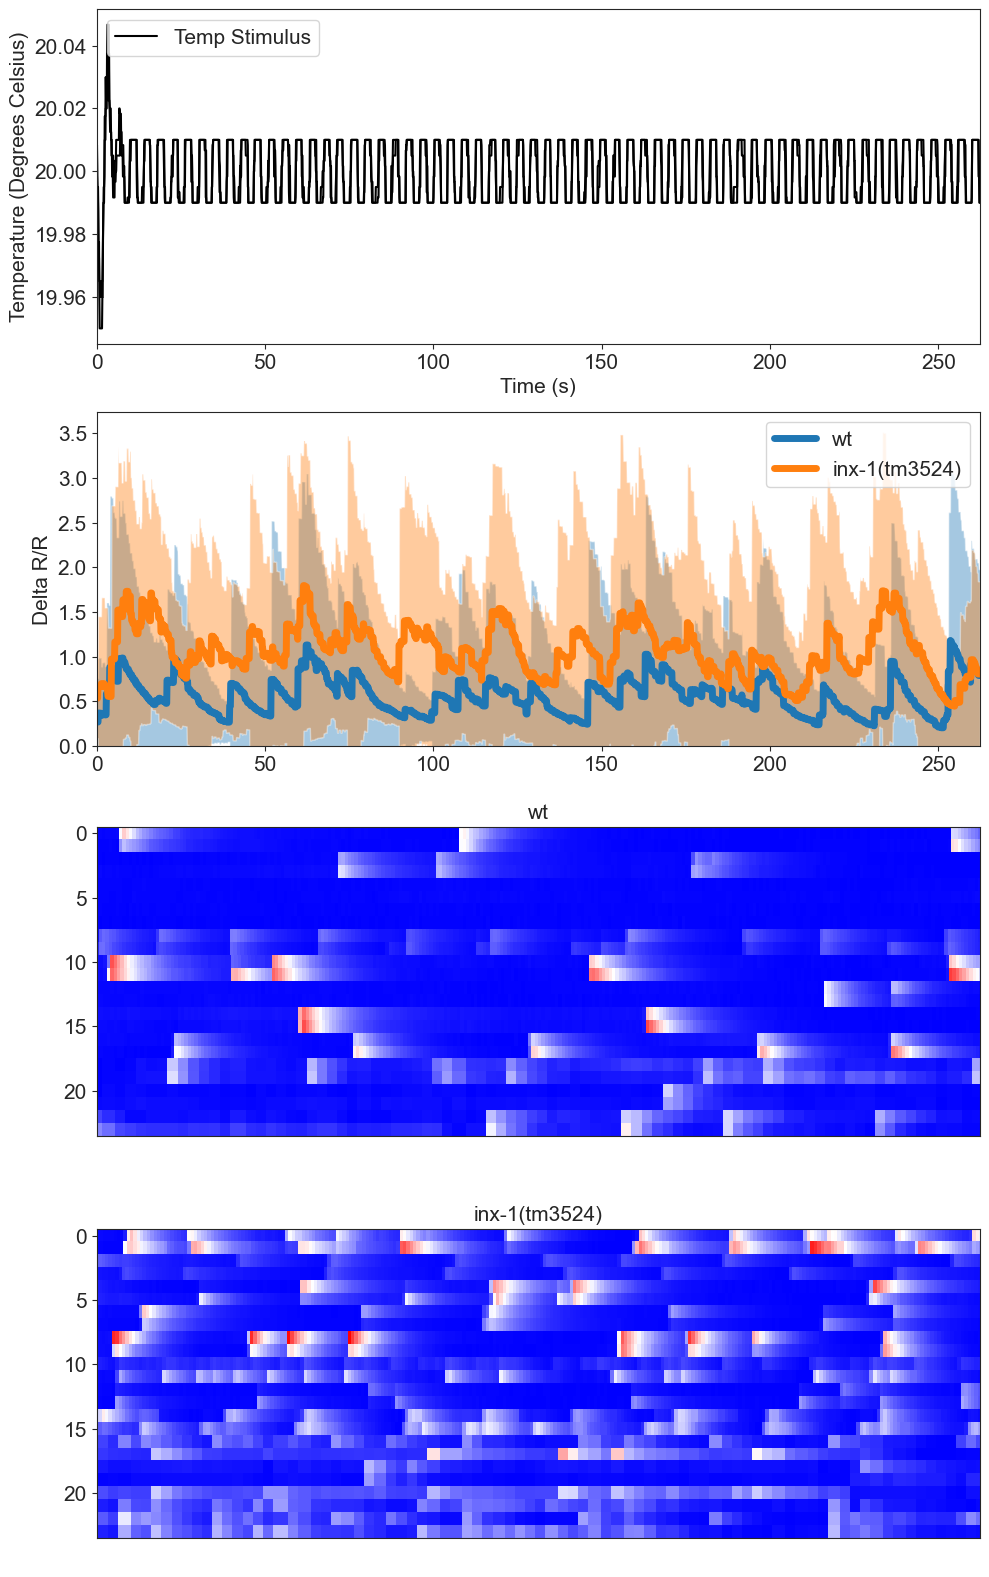

In [19]:
conditions_plot = [ Allwt, Allinx1 ]
heatmaps_plot = [ Allwt, Allinx1 ]

plot_Delta(conditions_plot, heatmaps_plot, sort = False, separate_temp= True )
#plt.savefig('C:/Users/dgmdi/OneDrive - Yale University/Documents/Inx1 Paper/Gus_inx1_vs_wt_Analysis/wtVsInx1HeatMap.svg', format='svg')

In [46]:
Allwt_avgRespRate = Allwt['Mean_Resp_Rate']
Allwt_RespRate = Allwt['Resp_Rate']
Allwt_NumsResps = Allwt['Resp']
#print(ai.shape)
#print(ai)
#lol
#type(lol)
#type(ai)
Allinx1_avgRespRate = Allinx1['Mean_Resp_Rate']
Allinx1_RespRate = Allinx1['Resp_Rate']
Allinx1_NumsResps = Allinx1['Resp']
#inx1_Times = wt['Time']
#inx1_Activ = wt['GCaMP']

In [26]:
wtTime = Allwt['Time']
inx1Time = Allinx1['Time']
ndarray_to_csv('Z:/Malcom/CaImg/Jupyter_Data_Dumpster/wtTime.csv', wtTime)
ndarray_to_csv('Z:/Malcom/CaImg/Jupyter_Data_Dumpster/inx1Time.csv', inx1Time)

In [8]:
only_033124_wt_avgRespRate = only_033124_wt['Mean_Resp_Rate']
only_033124_wt_RespRate = only_033124_wt['Resp_Rate']
only_033124_wt_NumsResps = only_033124_wt['Resp']
only_033124_inx1_avgRespRate = only_033124_inx1['Mean_Resp_Rate']
only_033124_inx1_RespRate = only_033124_inx1['Resp_Rate']
only_033124_inx1_NumsResps = only_033124_inx1['Resp']

only_200915_wt_avgRespRate = only_200915_wt['Mean_Resp_Rate']
only_200915_wt_RespRate = only_200915_wt['Resp_Rate']
only_200915_wt_NumsResps = only_200915_wt['Resp']
only_200915_inx1_avgRespRate = only_200915_inx1['Mean_Resp_Rate']
only_200915_inx1_RespRate = only_200915_inx1['Resp_Rate']
only_200915_inx1_NumsResps = only_200915_inx1['Resp']

only_200916_wt_avgRespRate = only_200916_wt['Mean_Resp_Rate']
only_200916_wt_RespRate = only_200916_wt['Resp_Rate']
only_200916_wt_NumsResps = only_200916_wt['Resp']
only_200916_inx1_avgRespRate = only_200916_inx1['Mean_Resp_Rate']
only_200916_inx1_RespRate = only_200916_inx1['Resp_Rate']
only_200916_inx1_NumsResps = only_200916_inx1['Resp']

In [23]:
def ndarray_to_csv(filename, ndarray):
    np.savetxt(filename, ndarray, delimiter=",")

In [47]:
                                
#ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/wt_avgRespRate_AllTimewd.csv", Allwt_avgRespRate)
ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/wt_RespRate_AllTimewd.csv", Allwt_RespRate)
ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/wt_NumsResps_AllTimewd.csv", Allwt_NumsResps)
#ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/inx1_avgRespRate_AllTimewd.csv", Allinx1_avgRespRate)
ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/inx1_RespRate_AllTimewd.csv", Allinx1_RespRate)
#ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/inx1_NumsResps_AllTimewd.csv", Allinx1_NumsResps)
#ndarray_to_csv("C:/\Users/dgmdi/OneDrive - Yale University/Documents/CaImg/Analysis/Gus_inx1_vs_wt_Analysis/AIY_Responses/inx1_Times_AllTimewd.csv",  Allinx1_Times)
#ndarray_to_csv("C:/\Users/dgmdi/OneDrive - Yale University/Documents/CaImg/Analysis/Gus_inx1_vs_wt_Analysis/AIY_Responses/inx1_Activ_AllTimewd.csv",  Allinx1_Activ)

In [11]:
ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/033124_wt_RespRate_AllTimewd.csv", only_033124_wt_RespRate)
ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/200915_wt_RespRate_AllTimewd.csv", only_200915_wt_RespRate)
ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/200916_wt_RespRate_AllTimewd.csv", only_200916_wt_RespRate)

ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/033124_inx1_RespRate_AllTimewd.csv", only_033124_inx1_RespRate)
ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/200915_inx1_RespRate_AllTimewd.csv", only_200915_inx1_RespRate)
ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/200916_inx1_RespRate_AllTimewd.csv", only_200916_inx1_RespRate)

In [15]:
import numpy as np
from scipy.stats import pearsonr

def calculate_pearsons(neuron_responses):
    pearsons = []
    for i in range(0, len(neuron_responses), 2):
        array1 = neuron_responses[i]
        array2 = neuron_responses[i+1]
        
        # Identify the indices where neither array1 nor array2 is nan
        not_nan_indices = ~np.isnan(array1) & ~np.isnan(array2)
        
        # Use these indices to select the non-nan values
        array1_without_nans = array1[not_nan_indices]
        array2_without_nans = array2[not_nan_indices]
        
        # Calculate the Pearson correlation coefficient
        r, _ = pearsonr(array1_without_nans, array2_without_nans)
        pearsons.append(r)
    return pearsons


In [16]:
pearsons_wt = calculate_pearsons(Allwt_RespRate)
print(pearsons_wt)
ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/wt_pearsons_1minTimewd.csv", pearsons_wt)

[0.9999999999999863, 0.8310091377597135, -0.29864407487129196, 0.3971535244142095, 0.22628029958006696, 0.8881695795049102, 0.9410872538658477, 0.9999999999999759, 0.6756508089060524, 1.0, 1.0, 1.0]


In [17]:
pearsons_inx1 = calculate_pearsons(Allinx1_RespRate)
print(pearsons_inx1)
ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/inx1_pearsons_1minTimewd.csv", pearsons_inx1)

[0.3704663050850356, -0.23585041069556512, 0.739019506891188, 0.3052025271710368, 0.9284491533273221, 0.19459890408954708, 0.5078783745803035, 0.43015632160533357, 0.1785118798257383, 0.8237225932686688, -0.39485488186065554, 0.42733837342570336]


# 1MIN TIME WINDOW

In [14]:
                                
ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/wt_avgRespRate_1minTimewd.csv", Allwt_avgRespRate)
ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/wt_RespRate_1minTimewd.csv", Allwt_RespRate)
#ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/wt_NumsResps_1minTimewd.csv", Allwt_NumsResps)
ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/inx1_avgRespRate_1minTimewd.csv", Allinx1_avgRespRate)
ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/inx1_RespRate_1minTimewd.csv", Allinx1_RespRate)
#ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/inx1_NumsResps_1minTimewd.csv", Allinx1_NumsResps)
#ndarray_to_csv("C:/\Users/dgmdi/OneDrive - Yale University/Documents/CaImg/Analysis/Gus_inx1_vs_wt_Analysis/AIY_Responses/inx1_Times_1minTimewd.csv",  Allinx1_Times)
#ndarray_to_csv("C:/\Users/dgmdi/OneDrive - Yale University/Documents/CaImg/Analysis/Gus_inx1_vs_wt_Analysis/AIY_Responses/inx1_Activ_1minTimewd.csv",  Allinx1_Activ)

In [11]:
ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/033124_wt_RespRate_1minTimewd.csv", only_033124_wt_RespRate)
ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/200915_wt_RespRate_1minTimewd.csv", only_200915_wt_RespRate)
ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/200916_wt_RespRate_1minTimewd.csv", only_200916_wt_RespRate)

ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/033124_inx1_RespRate_1minTimewd.csv", only_033124_inx1_RespRate)
ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/200915_inx1_RespRate_1minTimewd.csv", only_200915_inx1_RespRate)
ndarray_to_csv("Z:/Malcom/CaImg/Jupyter_Data_Dumpster/200916_inx1_RespRate_1minTimewd.csv", only_200916_inx1_RespRate)